<a href="https://colab.research.google.com/github/noorMisbah/LicensePlateNumberExtractionUsingOCR/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!sudo apt install tesseract-ocr
!pip install pytesseract opencv_python_headless matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,520 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [59]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [60]:
from google.colab import files
uploaded = files.upload()

Saving numberplate.png to numberplate (3).png


In [61]:
image_path=next(iter(uploaded))
image=cv2.imread(image_path)

In [62]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [63]:
#reduce noise
filtered=cv2.bilateralFilter(gray,11,17,17)

In [64]:
#detect edges
edge=cv2.Canny(filtered,30,200)

In [65]:
#contour detection
contours , _=cv2.findContours(edge.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [66]:
#sorting of contours
countours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

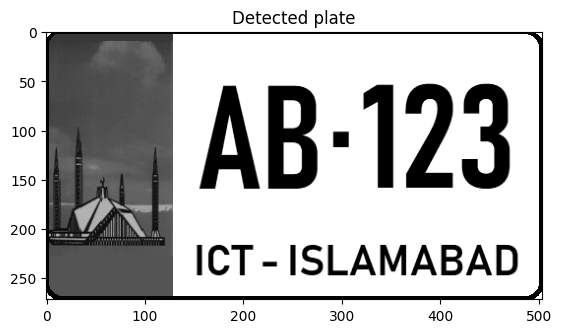

AB-123

0

edad

DN

ICT - ISLAMABAD



In [67]:
#now detection
license_plate_contour=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    license_plate_contour=approx
    break

if license_plate_contour is not None:
  #draw the contour
  cv2.drawContours(image,[license_plate_contour],-1,(0,255,0),3)
  #mask the license plate
  mask=cv2.fillPoly(gray.copy(),[license_plate_contour],0)
  masked_image=cv2.bitwise_and(gray,gray,mask=cv2.bitwise_not(mask))
  #crop the image
  x,y,w,h=cv2.boundingRect(license_plate_contour)
  license_plate=gray[y:y+h,x:x+w]
  plt.imshow(cv2.cvtColor(license_plate,cv2.COLOR_BGR2RGB))
  plt.title('Detected plate')
  plt.show()

  #apply ocr
  text=pytesseract.image_to_string(license_plate,config='--psm 11')
  print(text)

else:
  print("not found")
